## Logistic regression  in Theano

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import theano
import theano.tensor as T

### 'hello world' in Theano

In [2]:
# x is input placeholder
x = T.dmatrix('x')
# symbolic expression for logistic function
s = 1 / (1 + T.exp(-x))
# register s as a function of x
logistic = theano.function([x], s)

# call function (substitute value of x_input for x)
x_input = [[0, 1], [-1, -2]]
logistic(x_input)

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

### The model itself

The model uses regularization with $l_1$ and $l_2$ penalty, and is trained with gradient descent.

In [3]:
%load updates.py

In [4]:
%load logistic_regression.py

## Training on MNIST 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

X = mnist['data']
y = mnist['target'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0) 

In [6]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
X_train = sscaler.fit_transform(X_train)
X_test = sscaler.transform(X_test)

/opt/anaconda3/envs/nnets/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [7]:
lreg = LogisticRegression(
  n_iter=250,
  batch_size=None,
  lmbda=0.001,
  l1_ratio=0.5,
  learning_rate=0.25)

In [8]:
%time lreg.fit(X_train, y_train)

CPU times: user 1min 47s, sys: 644 ms, total: 1min 48s
Wall time: 55.9 s


In [9]:
from sklearn.metrics import classification_report, accuracy_score 

def plot_loss_and_accuracy(model, add_smoothing=False):
  plt.plot(model.losses)
 
  plt.title('Training loss (and smoothed) across iterations')
  plt.xlabel('No steps')
  plt.ylabel('Loss')
  print('Final loss: {:.4f}'.format(model.losses[-1]))
   
  if add_smoothing:
    ma_width = 5
    
    # pad the array so that numpy moving average makes sense for the whole range
    pad_width = (ma_width // 2, ma_width // 2)
    padded_losses = np.pad(model.losses, pad_width=pad_width, mode='edge')
    
    smoothed_sgd_loss = np.convolve(
      padded_losses,
      v = np.ones(ma_width) / ma_width,
      mode='valid')
    plt.plot(smoothed_sgd_loss)
    print('Final loss, smoothed: {:.4f}'.format(smoothed_sgd_loss[-1]))
  plt.show()
  
  y_pred = model.predict(X_test)
  print('accuracy: {:.4f}'.format(model.score(X_test, y_test)))
  print(classification_report(y_test, y_pred))

Final loss: 0.3723


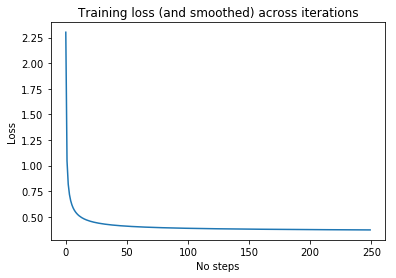

accuracy: 0.9159
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1381
          1       0.92      0.97      0.95      1575
          2       0.92      0.89      0.91      1398
          3       0.91      0.88      0.90      1428
          4       0.90      0.93      0.92      1365
          5       0.90      0.87      0.88      1263
          6       0.93      0.96      0.94      1375
          7       0.93      0.93      0.93      1458
          8       0.89      0.85      0.87      1365
          9       0.89      0.89      0.89      1392

avg / total       0.92      0.92      0.92     14000



In [10]:
plot_loss_and_accuracy(lreg)

## Logistic regression with Stochastic Gradient Descent

In [11]:
sgd_lreg = LogisticRegression(
  n_iter=250,
  batch_size=1000,
  lmbda=0.0001,
  l1_ratio=0.5,
  learning_rate=0.25)

%time sgd_lreg.fit(X_train, y_train)

CPU times: user 4.31 s, sys: 60 ms, total: 4.37 s
Wall time: 2.31 s


Final loss: 0.2920
Final loss, smoothed: 0.2878


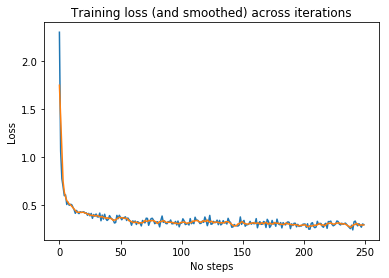

accuracy: 0.9177
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1381
          1       0.92      0.97      0.95      1575
          2       0.93      0.90      0.91      1398
          3       0.91      0.88      0.90      1428
          4       0.91      0.93      0.92      1365
          5       0.90      0.87      0.89      1263
          6       0.93      0.96      0.94      1375
          7       0.94      0.93      0.93      1458
          8       0.90      0.85      0.88      1365
          9       0.89      0.90      0.90      1392

avg / total       0.92      0.92      0.92     14000



In [12]:
plot_loss_and_accuracy(sgd_lreg, add_smoothing=True)

## Logistic regression with Stochastic Gradient Descent and momentum

Note learning rate is 10x lower and we use 2x less iterations.

In [13]:
sgd_momentum_lreg = LogisticRegression(
  n_iter=125,
  batch_size=1000,
  lmbda=0.0001,
  l1_ratio=0.5,
  learning_rate=0.025,
  momentum={
    'method': 'momentum',
    'decay': 0.9})

%time sgd_momentum_lreg.fit(X_train, y_train)

CPU times: user 2.62 s, sys: 24 ms, total: 2.65 s
Wall time: 1.47 s


Final loss: 0.2889
Final loss, smoothed: 0.3180


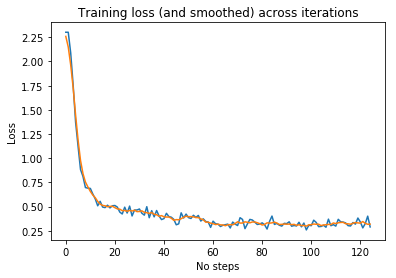

accuracy: 0.9139
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1381
          1       0.92      0.97      0.95      1575
          2       0.92      0.89      0.91      1398
          3       0.91      0.88      0.90      1428
          4       0.89      0.94      0.91      1365
          5       0.90      0.86      0.88      1263
          6       0.93      0.95      0.94      1375
          7       0.93      0.93      0.93      1458
          8       0.89      0.85      0.87      1365
          9       0.89      0.88      0.89      1392

avg / total       0.91      0.91      0.91     14000



In [14]:
plot_loss_and_accuracy(sgd_momentum_lreg, add_smoothing=True)

## Visualizing weights

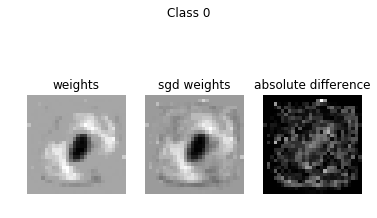

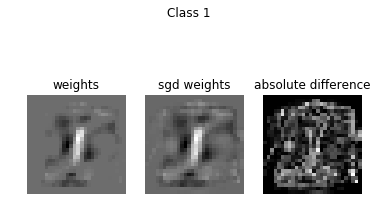

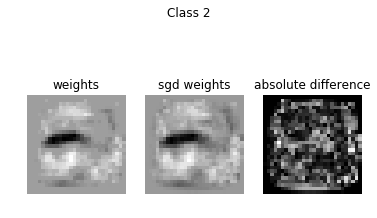

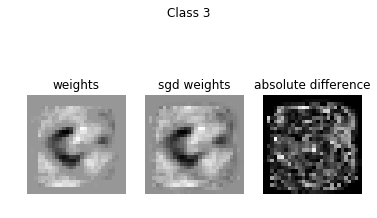

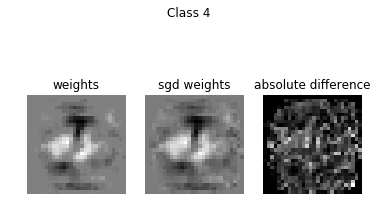

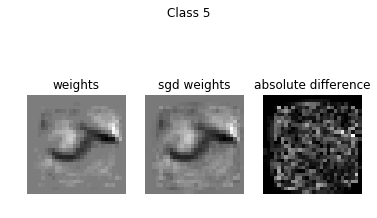

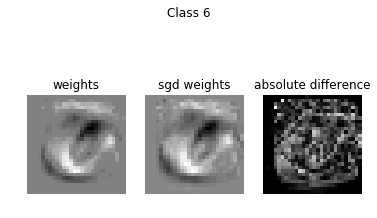

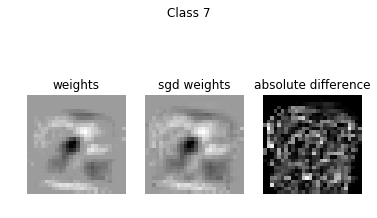

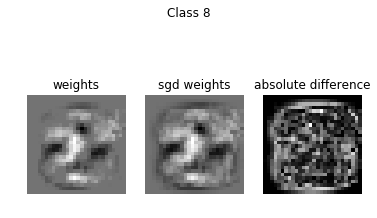

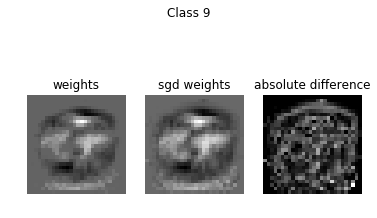

In [15]:
for i in range(10):
  digit_weights = lreg.thW.get_value().T[i, :].reshape(28, 28)
  sgd_digit_weights = sgd_lreg.thW.get_value().T[i, :].reshape(28, 28)
  f, ((ax1, ax2, ax3)) = plt.subplots(1, 3)
  f.suptitle('Class {}'.format(i)) 
  
  
  ax1.imshow(digit_weights , cmap='gray')
  ax1.set_title('weights')
  ax1.axis('off') 
  
  ax2.imshow(sgd_digit_weights, cmap='gray')
  ax2.set_title('sgd weights')
  ax2.axis('off') 
  
  ax3.imshow(abs(digit_weights - sgd_digit_weights), cmap='gray')
  ax3.set_title('absolute difference'.format(str(i)))
  ax3.axis('off') 
  plt.show()